# <center>Data Mining Project Code</center>

** **
## <center>*07 - Exploring Clustering Solutions*</center>

** **

After creating our clustering solutions, we decided to check how the customers where divided according to all variables in our dataset.

In this notebook, we start by importing all the data with the labels. After, we start exploring the variables according to the labels attribute to check if we can get any business insights.
** **


The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

2. [Merging Perspectives](#2.-Merging-Perspectives) <br>

    2.1 [Hierarchical Clustering Optimisation](#2.1-Hierarchical-Clustering-Optimisation) <br><br>

3. [Cluster Analysis](#3.-Cluster-Analysis) <br><br>

4. [Outliers](#4.-Outliers) <br><br>


# 1. Importing Libraries & Data

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
import functions as f
import umap.umap_ as umap
import visualizations_by_cluster as v
import plotly.express as px
import segmentation as s

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report


pd.set_option('display.max_columns', None)

In [145]:
data = pd.read_csv('./data/data.csv', 
                   index_col = "customer_id")

outliers_df = pd.read_csv('./data/outlier_data.csv', 
                   index_col = "customer_id")

Importing labeled data from each segmentation

In [114]:
temp_data = pd.read_csv('./data/labels/temp_data.csv',
                        index_col = 'customer_id' )
customer_data = pd.read_csv('./data/labels/customer_data_final.csv',
                        index_col = 'customer_id' )
spending_data = pd.read_csv('./data/labels/spending_data.csv',
                        index_col = 'customer_id' )
product_data = pd.read_csv('./data/labels/product_data_.csv',
                        index_col = 'customer_id' )
cuisine_data = pd.read_csv('./data/labels/cuisine_data.csv',
                        index_col = 'customer_id' )

Save the labels in the *data* Dataframe

In [115]:
data['temp_data_labels'] = temp_data['temp_data_labels']
data['customer_data_labels'] = customer_data['Cluster labels 4']
data['spending_data_labels'] = spending_data['spending_data_labels']
data['product_data_labels'] = product_data['product_data_labels']
data['cuisine_data_labels'] = cuisine_data['cusine_labels']

Saving the categorical features in a list and removing all ratio features

In [116]:
categ_cols = ['last_promo', 'payment_method']
categ_cols_enc = ['promo_DELIVERY', 'promo_DISCOUNT', 'promo_FREEBIE',
                  'promo_NO DISCOUNT', 'pay_CARD', 'pay_CASH',
                  'pay_DIGI', 'last_promo_enc', 'payment_method_enc',
                  'is_repeat_customer']

all_categ = categ_cols + categ_cols_enc

dow = ['DOW_' + str(i) + '_ratio' for i in range(7)]
hr = ['HR_' + str(i) + '_ratio' for i in range(1, 24)]



In [117]:
data.drop(dow, axis = 1, inplace = True)
data.drop(hr, axis = 1, inplace = True)

data.drop(data[s.cuisine_preferences], axis = 1, inplace = True)
data.drop('product_count', axis = 1, inplace = True)

In [118]:
data

customer_region  customer_age  vendor_count  is_chain  \
customer_id                                                          
1b8f824d5e              2360            18             2         1   
5d272b9dcb              8670            17             2         2   
f6d1b2ba63              4660            38             1         2   
180c632ed8              4660            27             2         1   
4eb37a6705              4660            20             2         0   
...                      ...           ...           ...       ...   
f4e366c281              8670            30             1         1   
f6b6709018              8670            26             1         0   
f74ad8ce3f              8670            24             1         1   
f7b19c0241              8670            34             1         0   
fd40d3b0e0              4660            30             1         0   

             first_order  last_order   last_promo payment_method  DOW_0  \
customer_id                                                               
1b8f824d5e             0           1     DELIVERY           DIGI      1   
5d272b9dcb             0           1     DISCOUNT           DIGI      1   
f6d1b2ba63             0           1     DISCOUNT           CASH      1   
180c632ed8             0           2     DELIVERY           DIGI      0   
4eb37a6705             0           2  NO DISCOUNT           DIGI      0   
...                  ...         ...          ...            ...    ...   
f4e366c281             0           0      FREEBIE           DIGI      0   
f6b6709018             0           0     DELIVERY           DIGI      0   
f74ad8ce3f             0           0  NO DISCOUNT           DIGI      0   
f7b19c0241             0           0     DISCOUNT           DIGI      0   
fd40d3b0e0             0           0  NO DISCOUNT           CASH      0   

             DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                     
1b8f824d5e       0      0      0      0      0      1     0     0     0     0   
5d272b9dcb       0      0      0      0      0      1     0     0     0     0   
f6d1b2ba63       0      0      0      0      0      1     0     0     0     0   
180c632ed8       1      0      0      0      0      1     0     0     0     0   
4eb37a6705       1      0      0      0      0      1     0     0     0     0   
...            ...    ...    ...    ...    ...    ...   ...   ...   ...   ...   
f4e366c281       0      0      0      0      0      1     0     0     0     0   
f6b6709018       0      0      0      0      0      1     0     0     0     0   
f74ad8ce3f       0      0      0      0      0      1     0     0     0     0   
f7b19c0241       0      0      0      0      0      1     0     0     0     0   
fd40d3b0e0       0      0      0      0      0      1     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0      1      0      0      0   
180c632ed8      0     0     0     0     0      0      1      0      0      1   
4eb37a6705      0     0     0     1     1      0      0      0      0      0   
...           ...   ...   ...   ...   ...    ...    ...    ...    ...    ...   
f4e366c281      0     0     0     0     0      0      0      0      1      0   
f6b6709018      0     0     0     0     0      0      0      0      0      0   
f74ad8ce3f      1     0     0     0     0      0      0      0      0      0   
f7b19c0241      0     0     0     0     0      0      1      0      0      0   
fd40d3b0e0      0     0     0     0     0      0      0      0      0      0   

             HR_15  HR_16  HR_1

# 2. Merging Perspectives

<a href="#top">Top &#129033;</a>

**Contingency Table**

In [119]:
crosstab = pd.crosstab(
    [data['temp_data_labels'], data['customer_data_labels']],
    [data['spending_data_labels'], data['product_data_labels'], data['cuisine_data_labels']]
)

crosstab

spending_data_labels                    0                                     \
product_data_labels                     0                       1              
cuisine_data_labels                     0    1    2   3    4    0    1     2   
temp_data_labels customer_data_labels                                          
0                0                      3   11   12   2    2   50  138   202   
                 1                      2    3   17   0    1  196  178   557   
                 2                      0    2    3   1    0   57   31    50   
                 3                      8   60   71   5   18  171  577   876   
1                0                      7   95   93  15   52   19   74    86   
                 1                      6   55   93   2   17   75  127   212   
                 2                      1   13    8   4    9    4   11    15   
                 3                     29  454  439  44  223  111  319   475   
2                0                      2   18   24   1    6   42  162   213   
                 1                      0    6   34   0    0  272  198   607   
                 2                      1    2    3   0    1   72   34    81   
                 3                     12   98  126  12   33  193  717  1002   

spending_data_labels                                                1       \
product_data_labels                             3                   0        
cuisine_data_labels                     3    4  0   1   2  3  4     0    1   
temp_data_labels customer_data_labels                                        
0                0                      1   25  0   0   1  0  0    35    0   
                 1                      1   23  0   0   0  0  0    55    9   
                 2                      1   11  0   0   0  0  0   463    3   
                 3                     33  144  0   1   0  0  0    56    2   
1                0                      6   42  0   3   2  1  1   156    7   
                 1                      6   69  0   0   0  0  0   388  100   
                 2                      5    9  0   1   1  0  0  1803   24   
                 3                     39  143  1  18  12  0  2   264   23   
2                0                     11   45  0   0   0  0  0    35    1   
                 1                      3   35  0   0   0  0  0    91   14   
                 2                      2   10  0   0   0  0  0   333    4   
                 3                     29  221  0   1   2  0  0    45   10   

spending_data_labels                                                           \
product_data_labels                                   1                     3   
cuisine_data_labels                      2  3   4     0    1    2  3   4    0   
temp_data_labels customer_data_labels                                           
0                0                      10  0   0   200    7   30  0   0    1   
                 1                      39  0   0   706   60  341  0   4    0   
                 2                      29  0   0  1728   26  242  0   0   11   
                 3                      14  0   1   443   20   85  0   0    4   
1                0                      68  1   1   103   28   50  0   3   11   
                 1                     607  2  13   492  168  501  1  32   10   
                 2                     245  0   1   761   38  152  0   4  242   
                 3                     136  0   3   200   41  110  0   3   20   
2                0                       7  0   0   224   15   74  0   1    1   
                 1                      89  0   3   892   69  406  0   6    0   
                 2                      37  1   0  1477   28  219  0   3    8   
                 3                      17  0   0   487   23  108  0   3    1   

spending_data_labels                        2                                 \
product_data_labels                         0                    1             
cuisine_data_

In [120]:
num_clusters = (crosstab > 0).sum().sum()
num_clusters

330

Computing Cluster Centroids

In [121]:
data_centroids = (
    data.drop(columns=all_categ)  
    .groupby(['temp_data_labels', 
              'customer_data_labels', 
              'spending_data_labels', 
              'product_data_labels', 
              'cuisine_data_labels'])  
    .mean()  
)


data_centroids

customer_region  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                    
0                0                    0                    0                   0                        8670.000000   
                                                                               1                        8305.454545   
                                                                               2                        7279.166667   
                                                                               3                        8670.000000   
                                                                               4                        8670.000000   
...                                                                                                             ...   
2                3                    2                    0                   3                        8670.000000   
                                                                               4                        8670.000000   
                                                           3                   1                        6405.000000   
                                                                               3                        8670.000000   
                                                                               4                        8670.000000   

                                                                                                    customer_age  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                 
0                0                    0                    0                   0                       41.000000   
                                                                               1                       39.727273   
                                                                               2                       39.500000   
                                                                               3                       39.500000   
                                                                               4                       40.000000   
...                                                                                                          ...   
2                3                    2                    0                   3                       24.000000   
                                                                               4                       24.000000   
                                                           3                   1                       25.000000   
                                                                               3                       30.000000   
                                                                               4                       32.000000   

                                                                                                    vendor_count  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                 
0                0                    0                    0                   0                        4.000000   
                                                                               1                        4.090909   
                                                                               2                        3.750000   
                                                                               3                        3.500000   
                                                                               4                        4.500000   
...                                                                                                          ...   
2                3                    2                    0                   3                        7.500000   

## 2.1 Hierarchical Clustering Optimisation

<a href="#top">Top &#129033;</a>

Here we will use the same approach for optimising the parameters of Hierarchical Clustering as we did in the segmentation notebooks

In [84]:
linkages = ["complete", "average", "single", "ward"]

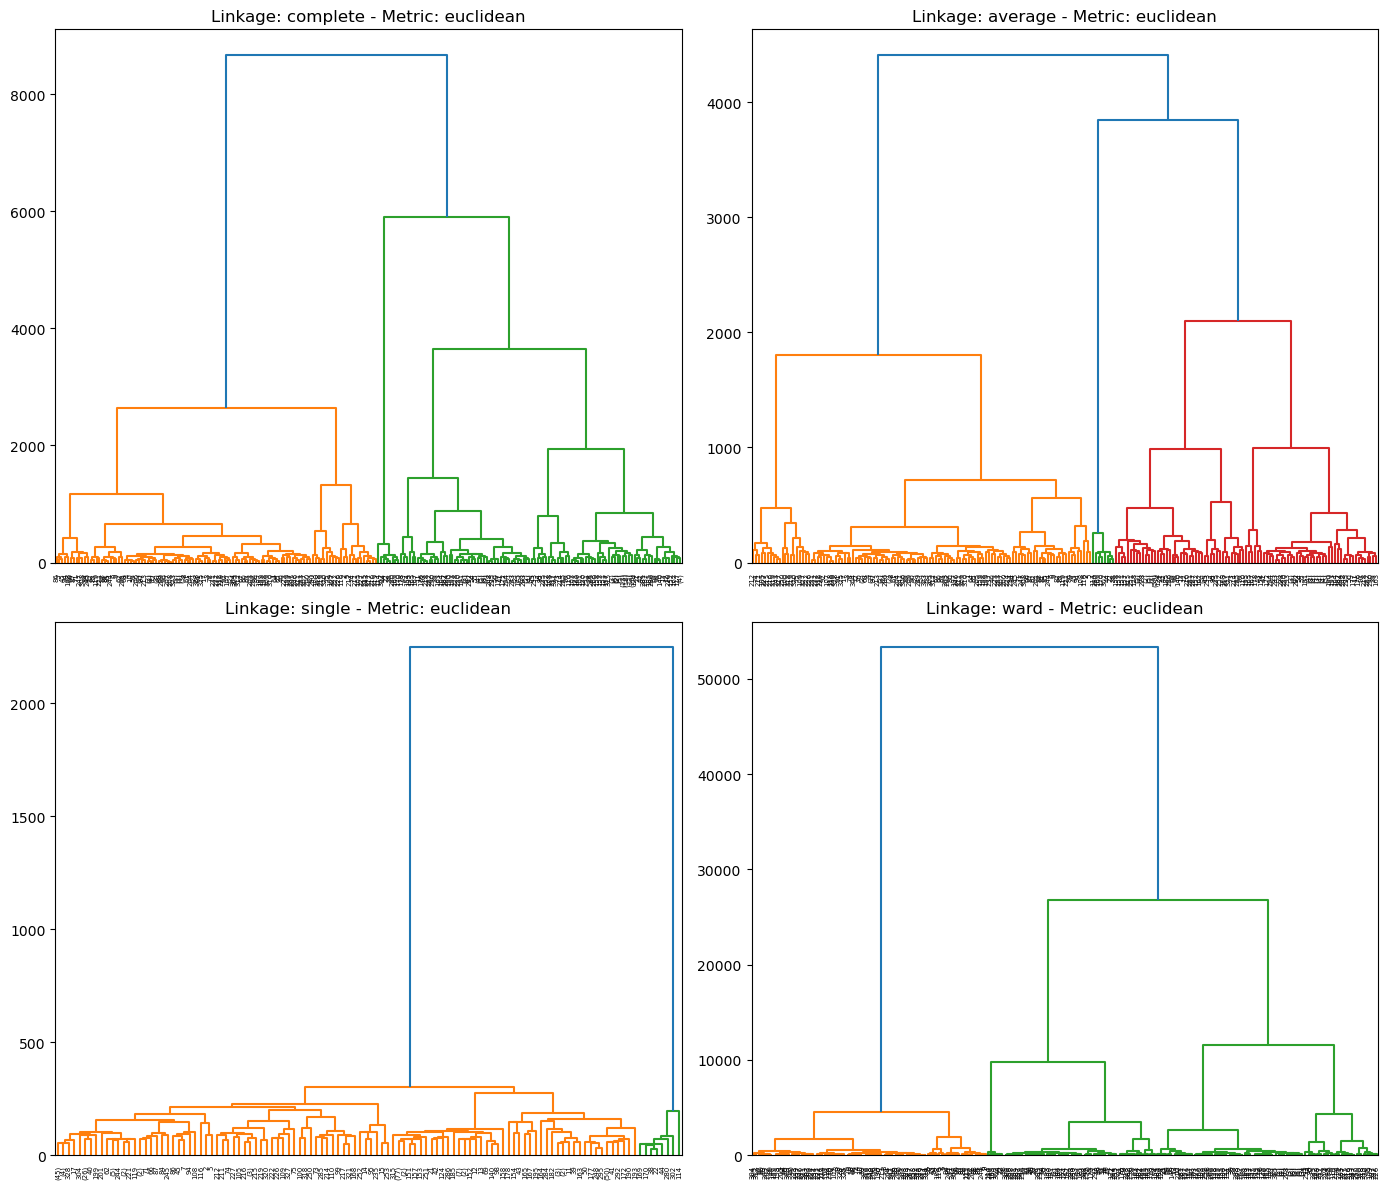

In [85]:
f.plot_hierarchical_dendrograms(data_centroids, 
                                path=None, 
                                linkages=linkages, 
                                metrics=['euclidean'])

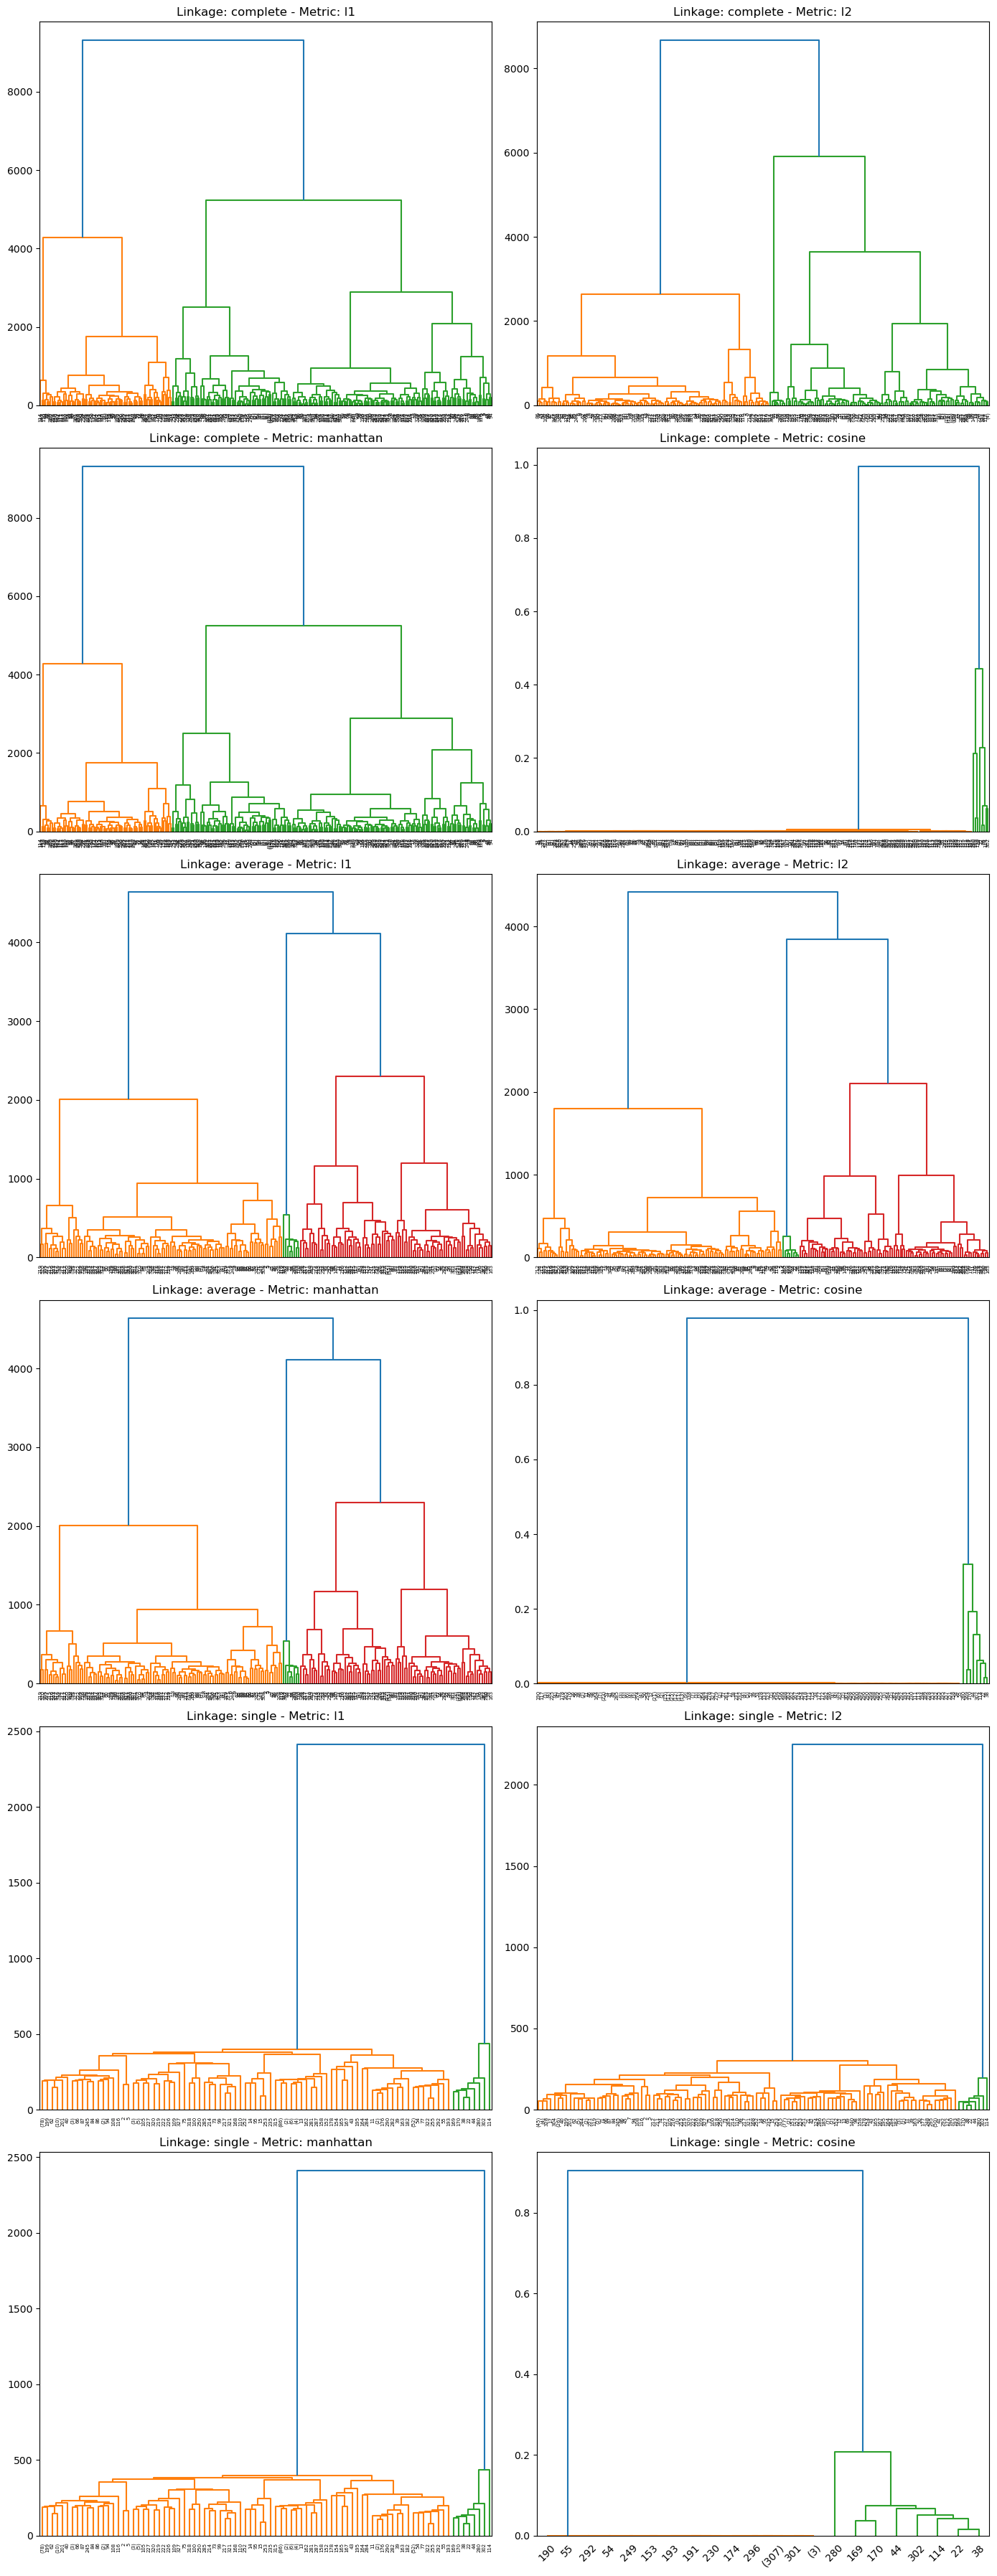

In [86]:
f.plot_hierarchical_dendrograms(data_centroids, 
                                path=None, 
                                linkages=linkages[:3], 
                                metrics=['l1', 'l2', 'manhattan',
                                         'cosine'])

In [87]:
results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'ward', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l2'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'manhattan'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'l2'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'manhattan'}
    for k in range(2, 11)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=data_centroids, feats=data_centroids.columns.tolist(), **settings)
    results.append(result)

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)
final_results_df

Model  n_clusters  linkage     metric        R2  Silhouette  \
0   hierarchical           2  average  euclidean  0.785969    0.718973   
1   hierarchical           3  average  euclidean  0.844703    0.671893   
2   hierarchical           4  average  euclidean  0.950135    0.779541   
3   hierarchical           5  average  euclidean  0.978259    0.761949   
4   hierarchical           6  average  euclidean  0.981055    0.694732   
..           ...         ...      ...        ...       ...         ...   
85  hierarchical           6  average  manhattan  0.981055    0.694732   
86  hierarchical           7  average  manhattan  0.987220    0.719992   
87  hierarchical           8  average  manhattan  0.992539    0.685216   
88  hierarchical           9  average  manhattan  0.993371    0.663366   
89  hierarchical          10  average  manhattan  0.995080    0.661092   

    Calinski-Harabasz  
0         1204.491466  
1          889.319555  
2         2070.538125  
3         3655.874221  
4         3355.569778  
..                ...  
85        3355.569778  
86        4158.554973  
87        6119.220954  
88        6012.463318  
89        7191.102514  

[90 rows x 7 columns]

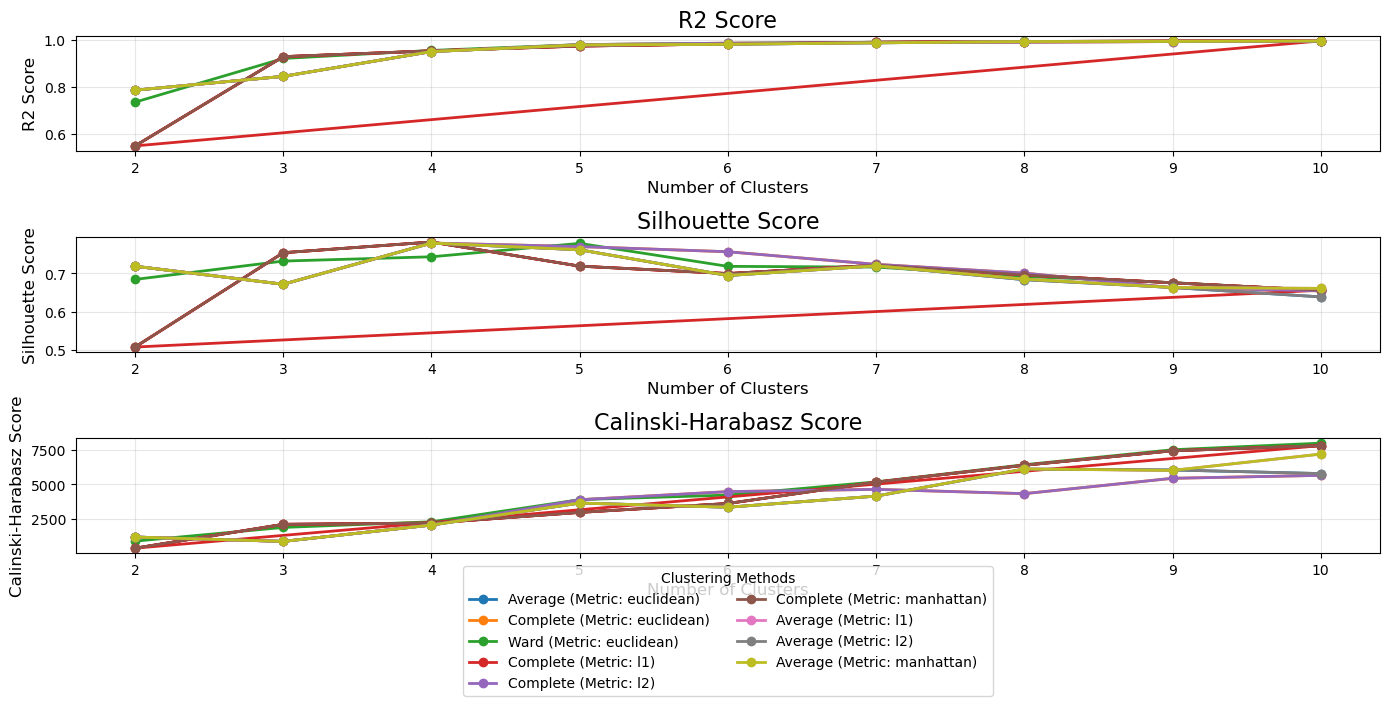

In [88]:
f.plot_evaluation_scores(final_results_df)

**Final Cluster Decision**

In [122]:
linkage = 'ward'

hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean',
    n_clusters= 3
)

hclust_labels = hclust.fit_predict(data_centroids)
data_centroids['hclust_labels'] = hclust_labels

In [123]:
cluster_mapper = data_centroids['hclust_labels'].to_dict()

**Final Merged Labels**

In [124]:
df = data.copy()

df['merged_labels'] = df.apply(
    lambda row: cluster_mapper[
        (
            row['temp_data_labels'], 
            row['customer_data_labels'], 
            row['spending_data_labels'], 
            row['product_data_labels'], 
            row['cuisine_data_labels']
        )
    ], axis=1
)

df

customer_region  customer_age  vendor_count  is_chain  \
customer_id                                                          
1b8f824d5e              2360            18             2         1   
5d272b9dcb              8670            17             2         2   
f6d1b2ba63              4660            38             1         2   
180c632ed8              4660            27             2         1   
4eb37a6705              4660            20             2         0   
...                      ...           ...           ...       ...   
f4e366c281              8670            30             1         1   
f6b6709018              8670            26             1         0   
f74ad8ce3f              8670            24             1         1   
f7b19c0241              8670            34             1         0   
fd40d3b0e0              4660            30             1         0   

             first_order  last_order   last_promo payment_method  DOW_0  \
customer_id                                                               
1b8f824d5e             0           1     DELIVERY           DIGI      1   
5d272b9dcb             0           1     DISCOUNT           DIGI      1   
f6d1b2ba63             0           1     DISCOUNT           CASH      1   
180c632ed8             0           2     DELIVERY           DIGI      0   
4eb37a6705             0           2  NO DISCOUNT           DIGI      0   
...                  ...         ...          ...            ...    ...   
f4e366c281             0           0      FREEBIE           DIGI      0   
f6b6709018             0           0     DELIVERY           DIGI      0   
f74ad8ce3f             0           0  NO DISCOUNT           DIGI      0   
f7b19c0241             0           0     DISCOUNT           DIGI      0   
fd40d3b0e0             0           0  NO DISCOUNT           CASH      0   

             DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                     
1b8f824d5e       0      0      0      0      0      1     0     0     0     0   
5d272b9dcb       0      0      0      0      0      1     0     0     0     0   
f6d1b2ba63       0      0      0      0      0      1     0     0     0     0   
180c632ed8       1      0      0      0      0      1     0     0     0     0   
4eb37a6705       1      0      0      0      0      1     0     0     0     0   
...            ...    ...    ...    ...    ...    ...   ...   ...   ...   ...   
f4e366c281       0      0      0      0      0      1     0     0     0     0   
f6b6709018       0      0      0      0      0      1     0     0     0     0   
f74ad8ce3f       0      0      0      0      0      1     0     0     0     0   
f7b19c0241       0      0      0      0      0      1     0     0     0     0   
fd40d3b0e0       0      0      0      0      0      1     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0      1      0      0      0   
180c632ed8      0     0     0     0     0      0      1      0      0      1   
4eb37a6705      0     0     0     1     1      0      0      0      0      0   
...           ...   ...   ...   ...   ...    ...    ...    ...    ...    ...   
f4e366c281      0     0     0     0     0      0      0      0      1      0   
f6b6709018      0     0     0     0     0      0      0      0      0      0   
f74ad8ce3f      1     0     0     0     0      0      0      0      0      0   
f7b19c0241      0     0     0     0     0      0      1      0      0      0   
fd40d3b0e0      0     0     0     0     0      0      0      0      0      0   

             HR_15  HR_16  HR_1

Distribution of customers across each cluster

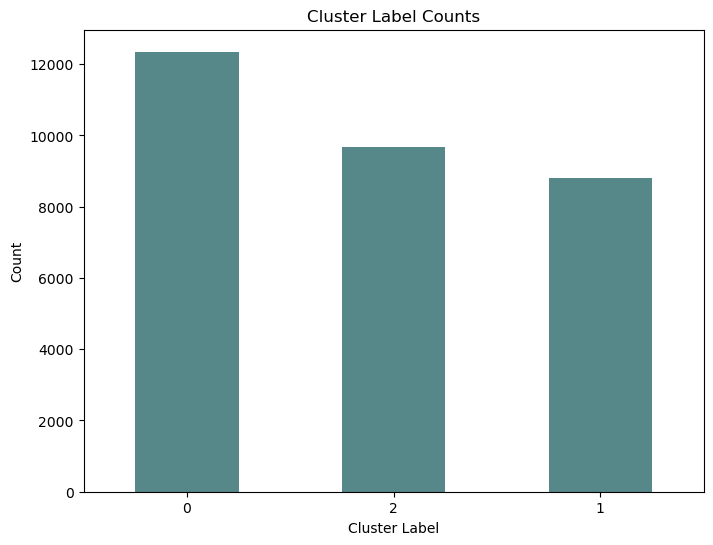

In [125]:
f.plot_counts(df['merged_labels'])

In [126]:
# cluster size
df.groupby('merged_labels')\
    .size()\
    .to_frame()


0
merged_labels       
0              12351
1               8815
2               9684

# 3. Cluster Analysis

<a href="#top">Top &#129033;</a>

Assigning df back to data

In [127]:
data = df.copy()

Displaying the mean of each feature per cluster

In [96]:
pd.set_option('display.max_rows', None)
data.groupby('merged_labels').mean(numeric_only=True).T

merged_labels                              0             1             2
customer_region                  4858.470569   8291.162791   2440.523544
customer_age                       27.456076     27.691322     27.429884
vendor_count                        2.664238      2.864095      3.669868
is_chain                            2.105740      1.738627      4.149525
first_order                        29.998057     31.005786     24.855432
last_order                         64.229374     62.452411     63.197646
DOW_0                               0.456562      0.471015      0.622367
DOW_1                               0.477046      0.466818      0.632487
DOW_2                               0.504575      0.477368      0.658199
DOW_3                               0.556635      0.475326      0.679265
DOW_4                               0.660270      0.478162      0.734614
DOW_5                               0.599142      0.519569      0.732239
DOW_6                               0.634200      0.532955      0.810615
HR_1                                0.017569      0.113103      0.036658
HR_2                                0.020079      0.147703      0.024783
HR_3                                0.038296      0.323539      0.018794
HR_4                                0.032305      0.280658      0.010946
HR_5                                0.027204      0.221441      0.011565
HR_6                                0.036515      0.164265      0.012288
HR_7                                0.047041      0.138854      0.034903
HR_8                                0.095215      0.167555      0.090768
HR_9                                0.214558      0.284742      0.139818
HR_10                               0.314145      0.361202      0.223978
HR_11                               0.265970      0.296313      0.508468
HR_12                               0.198850      0.197618      0.506712
HR_13                               0.174399      0.150312      0.344486
HR_14                               0.213748      0.131707      0.247109
HR_15                               0.383289      0.107431      0.228005
HR_16                               0.567808      0.080885      0.263321
HR_17                               0.542709      0.050028      0.433395
HR_18                               0.344426      0.029155      0.552251
HR_19                               0.173832      0.013159      0.503717
HR_20                               0.074002      0.010777      0.324866
HR_21                               0.040240      0.008168      0.157373
HR_22                               0.028095      0.022348      0.086225
HR_23                               0.020484      0.046625      0.065469
promo_DELIVERY                      0.180876      0.215882      0.205184
promo_DISCOUNT                      0.143389      0.122405      0.157476
promo_FREEBIE                       0.123472      0.160749      0.133003
promo_NO DISCOUNT                   0.552263      0.500964      0.504337
pay_CARD                            0.650150      0.617811      0.615655
pay_CASH                            0.176747      0.159047      0.195787
pay_DIGI                            0.173103      0.223142      0.188558
last_promo_enc                      0.838070      0.942938      0.919145
payment_method_enc              15127.703587  14682.353035  14634.804007
days_between                       34.231317     31.446625     38.342214
total_orders                        3.888430      3.421214      4.869785
avg_order_hour                     14.017538      8.718249     15.056991
total_spend                        32.759537     52.813980     22.333463
avg_spend_prod                      7.336253     11.901459      3.905199
is_repeat_customer                  0.754595      0.751220      0.809686
avg_prod_vendor                     1.725881      1.687553      1.625585
avg_orders_vendor                   1.429952      1.178755      1.294321
avg_prod_order                      1.209723      1.441244

In [97]:
pd.reset_option('display.max_rows', None)

In [98]:
# v.plot_grouped_bar_chart(data, 'product_count',
#                          'last_promo', 
#                          data['merged_labels'])

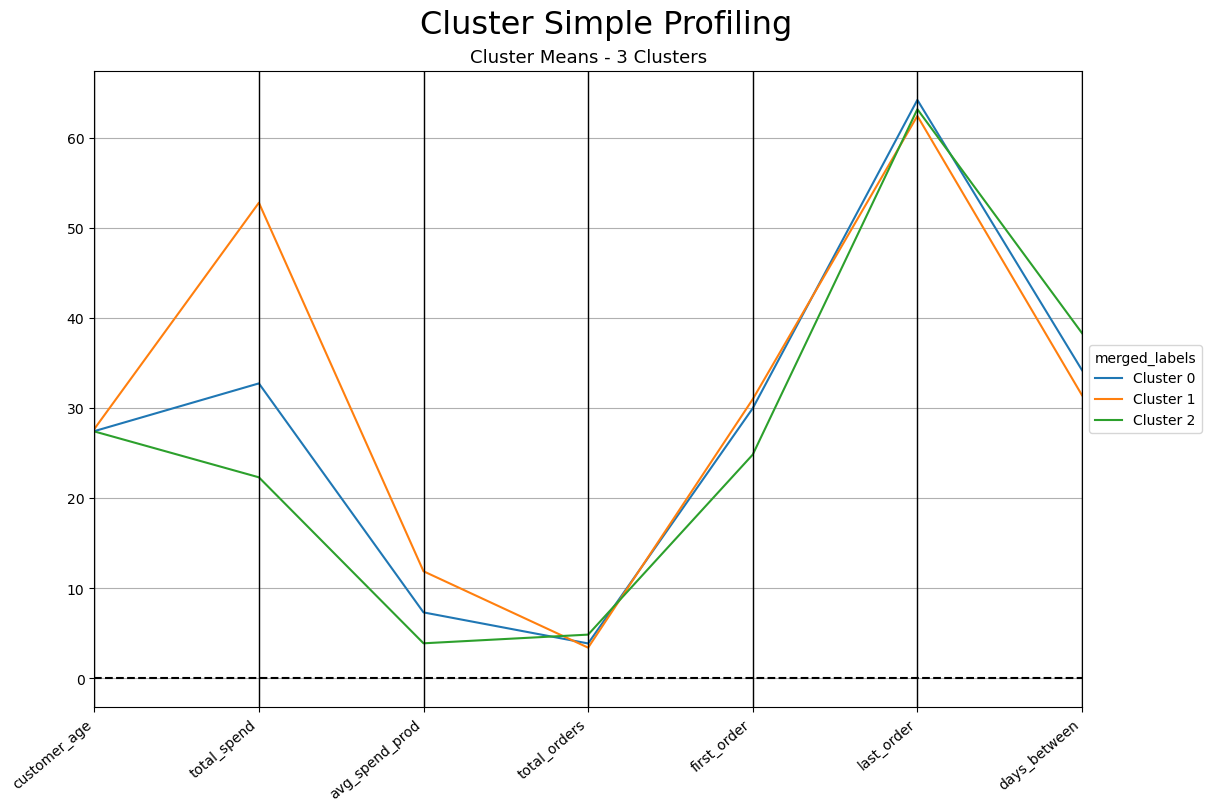

In [99]:
label_cols = ['merged_labels']

f.cluster_profiles(
    df=data[['customer_age', 'total_spend', 'avg_spend_prod', 'total_orders', 'first_order', 'last_order',
             'days_between'] + label_cols], 
    label_columns = label_cols,
    figsize=(12, 8), 
    cmap="tab10",
    compare_titles=None
)


In [102]:
v.plot_boxplot_by_cluster(data, 'merged_labels', 'CUI_Italian_ratio')

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [104]:
v.plot_boxplot_by_cluster(data, 'merged_labels', 'CUI_American_ratio')

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [105]:
v.plot_boxplot_by_cluster(data, 'merged_labels', 'CUI_Asian_ratio')

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [106]:
v.plot_boxplot_by_cluster(data, 'merged_labels', 'avg_spend_prod')

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [107]:
hour_columns = [f'HR_{i}' for i in range(1, 24)]

# Compute mean values grouped by labels
df_hour = data[hour_columns + ['merged_labels']].groupby('merged_labels').mean()

# Convert cluster labels to strings for proper display
df_hour.index = df_hour.index.astype(str)

# Create heatmap
fig = px.imshow(
    df_hour, 
    labels={'x': 'Hour', 'y': 'Cluster', 'color': 'Average Orders'},
    x=hour_columns, 
    y=df_hour.index, 
    color_continuous_scale='Cividis',
    title='Cluster Distribution Across Hours of the Day'
)

fig.show()


In [108]:
v.plot_avg_hr_by_label(data, 'merged_labels')

**UMAP visualisation**

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



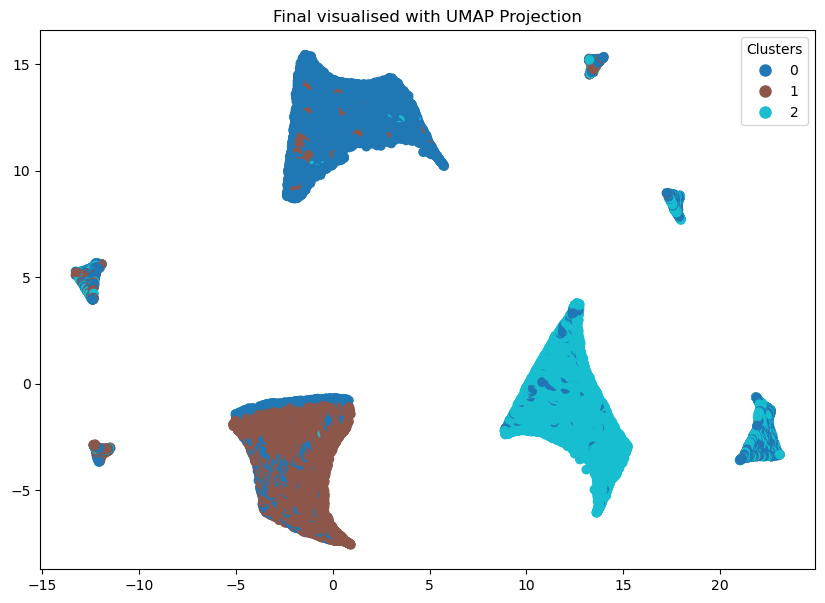

In [129]:
labels = data['merged_labels']

umap_object = umap.UMAP(n_neighbors = 200)
umap_embedding = umap_object.fit_transform(data.drop(all_categ, axis = 1))

f.plot_dim_reduction(umap_embedding, targets = labels,
                   technique = 'Final visualised with UMAP')

# 4. Outliers

<a href="#top">Top &#129033;</a>

In [154]:
# Preparing the data

X = data.drop(['temp_data_labels', 'customer_data_labels', 'spending_data_labels', 
                  'product_data_labels', 'cuisine_data_labels', 
               'merged_labels'] + all_categ, axis = 1)
y = data['merged_labels']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 92.66% of the customers correctly


In [162]:
# Predictions for training and test sets
y_train_pred = dt.predict(X_train)  
y_test_pred = dt.predict(X_test)   

# F1 scores
f1_train = f1_score(y_train, y_train_pred, average='weighted')  
f1_test = f1_score(y_test, y_test_pred, average='weighted')     

# Print F1 scores
print("Training F1 Score: {:.2f}".format(f1_train))
print("Test F1 Score: {:.2f}".format(f1_test))

# Classification reports
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred))
print(' ')

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

Training F1 Score: 0.93
Test F1 Score: 0.93

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9888
           1       0.96      0.94      0.95      7042
           2       1.00      0.85      0.92      7750

    accuracy                           0.93     24680
   macro avg       0.94      0.92      0.93     24680
weighted avg       0.93      0.93      0.93     24680

 

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2463
           1       0.96      0.93      0.95      1773
           2       1.00      0.86      0.92      1934

    accuracy                           0.93      6170
   macro avg       0.94      0.92      0.93      6170
weighted avg       0.93      0.93      0.93      6170



In [155]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

customer_region       0.882812
avg_spend_prod        0.100038
customer_age          0.017149
weekend_orders        0.000000
CUI_American_ratio    0.000000
                        ...   
HR_16                 0.000000
HR_17                 0.000000
HR_18                 0.000000
HR_19                 0.000000
20_23h                0.000000
Length: 68, dtype: float64

In [157]:
# Predicting the cluster labels of the outliers
outliers_df['merged_labels'] = dt.predict(outliers_df[data.drop(['temp_data_labels', 'customer_data_labels', 'spending_data_labels', 
                  'product_data_labels', 'cuisine_data_labels', 
               'merged_labels'] + all_categ, axis = 1).columns])
outliers_df.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                               
fd399c247b              2440            22             4             15   
ef760c3a3c              2360            26             1              6   
7b0661a6ba              2360            30             1             19   
01ad9867f2              8670            29            14             32   
c887818ebd              4140            32             1              7   

             is_chain  first_order  last_order   last_promo payment_method  \
customer_id                                                                  
fd399c247b          3            0          32     DISCOUNT           CARD   
ef760c3a3c          0            0          40     DISCOUNT           CARD   
7b0661a6ba         14            0          43      FREEBIE           CARD   
01ad9867f2         16            0          58  NO DISCOUNT           CARD   
c887818ebd          0            0          62  NO DISCOUNT           CARD   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
fd399c247b           0.00       0.00            0.0       0.0   
ef760c3a3c           0.00       0.00            0.0       0.0   
7b0661a6ba           0.00       0.00            0.0       0.0   
01ad9867f2          11.73     287.09            0.0       0.0   
c887818ebd           0.00       0.00            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
fd399c247b                  0.0          0.0          3.46         0.00   
ef760c3a3c                  0.0          0.0          0.00         0.00   
7b0661a6ba                  0.0          0.0          0.00         0.00   
01ad9867f2                  0.0          0.0          0.00        50.31   
c887818ebd                  0.0          0.0          0.00         0.00   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
fd399c247b        14.05         0.00          0.00              60.21   
ef760c3a3c         0.00         0.00         11.28               0.00   
7b0661a6ba        50.86         0.00          0.00               0.00   
01ad9867f2         0.00         0.00          0.00               0.00   
c887818ebd         0.00        45.02          0.00               0.00   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
fd399c247b         0.0                      0.00       0.0      1      0   
ef760c3a3c         0.0                      0.00       0.0      0      1   
7b0661a6ba         0.0                      0.00       0.0      4      3   
01ad9867f2         0.0                     12.08       0.0      3      4   
c887818ebd         0.0                      0.00       0.0      0      0   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_1  HR_2  HR_3  HR_4  HR_5  \
customer_id                                                                    
fd399c247b       1      1      0      0      3     0     0     0     0     0   
ef760c3a3c       0      2      1      1      1     0     0     0     0     0   
7b0661a6ba       3      0      1      2      1     0     0     0     0     0   
01ad9867f2       1      2      2      3      5     0     2     5     2     1   
c887818ebd       1      0      0      1      2     0     0     0     0     0   

             HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  HR_15  \
customer_id                                                                     
fd399c247b      0     0     0     0      0      0      0      0      0      0   
ef760c3a3c      0     0     0     0      0      0      0      0      0      0   
7b0661a6ba      0     0     